# Project 2 - PDEs, Laplace’s Equation, and the Method of Relaxation

### <p style="text-align: right;">  Kyle Taft

In [1]:
# Import packages
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym
from sympy import symbols
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D

## Problem Statement

This problem is inspired by investigating the other uses of solving Laplace's equation. Here, we will investigate a steady-state heat flow problem. This problem is simplified by assuming the material is homogenous and the situation is in 1D (we will see why such a simply case later). Specifically, say we have an experiment where we want to investigate a thermal gradient along a plate of metal, side length L, where three edges are touching a large sink of ice and one edge is touching a unique heat source that is created by a machine we can tune. Here it is a quadratic with peak of 100 degrees. Our cordinate system is set-up such that the bottom left corner is at the origin. We set these boundary conditions as follows:

$$T(x, 0) = 0$$

$$T(x, L) = 0$$

$$T(0, y) = 0$$

$$T(L, y) = -16y^2 + 16Ly$$


## Background

The [heat equation](https://en.wikipedia.org/wiki/Heat_equation#Steady-state_heat_equation) can be formulated as:

$$\frac{\partial T}{\partial t} = \alpha \nabla^2 T$$

where $T = T(x, y, z, t)$ is the temperature of a specific problem as a function of 3D position and time and $\alpha$ is the thermal diffusivity of the material in SI units of $\frac{m^2}{s}$. 

For steady-state heat flow, the left side of the equation is zero, and we are left with Laplace's equation:

$$\nabla^2 T = 0$$

As shown in class, this equation can be solved using separation of variables. We can assume that the solution is of the form:

$$T(x,y,z) = X(x)Y(y)Z(z)$$

Plugging this into Laplace's equation, we get:

$$\frac{1}{X}\frac{d^2X}{dx^2} + \frac{1}{Y}\frac{d^2Y}{dy^2} + \frac{1}{Z}\frac{d^2Z}{dz^2} = 0$$

since each term is a function of a different variable, each term must be a constant constrained such that $k_1 + k_2 + k_3 = 0$. This gives us three equations:

$$\frac{d^2X}{dx^2} = k_1X$$

$$\frac{d^2Y}{dy^2} =  k_2Y$$

$$\frac{d^2Z}{dz^2} =  k_3Z$$


Each of these equations has the general solution:

$$X(x) = Ae^{\sqrt{k_1}x} + Be^{-\sqrt{k_1}x}$$

$$Y(y) = Ce^{\sqrt{k_2}y} + De^{-\sqrt{k_2}y}$$

$$Z(z) = Fe^{\sqrt{k_3}z} + Ge^{-\sqrt{k_3}z}$$

We can use the boundary conditions to determine the values of the constants.


## Analytical Investigation

In our situation, we have a square of metal laying on the xy-plane. This means that we can assume that the solution is separable in the x and y directions (No need for z). This means that we can assume that $k_3 = 0$. Additionally, we can specify that we expect to see an exponential in the x-direction and sinudual behavior in the y-direction. This gives us the following equations:


$$T(x,y) = X(x)Y(y)$$


$$\frac{d^2X}{dx^2} = k^2X$$

$$\frac{d^2Y}{dy^2} =  -k^2Y$$

$$\frac{d^2Z}{dz^2} =  0$$

$$X(x) = Ae^{kx} + Be^{-kx}$$

$$Y(y) = Csin(k^2y) + Dcos(k^2y)$$

We can use the boundary conditions to determine the values of the constants:

$$T(x, 0) = 0 \rightarrow D = 0$$

$$T(0, y) = 0 \rightarrow A = -B$$

$$T(x, L) = 0 \rightarrow k^2 = \frac{n\pi}{L}$$

We can now write the solution as:

$$T(x, y) = \sum_{n=1}^{\infty} C_nsin(\frac{n\pi}{L}y)(e^{(\frac{n\pi}{L})x} - e^{-(\frac{n\pi}{L})x}) $$

Where $C_n$ is a constant (for a specific n) that we combined from our unknowns. We can now use the last boundary condition and Fourier's trick to determine the values of the constants.

We know that:

$$\int_{0}^{L}sin(\frac{n\pi}{L}y)sin(\frac{m\pi}{L}y)dx = \frac{L}{2}\delta_{nm}$$

And with plugging in our boundary condition we get:

$$T(L, y) = \sum_{n=1}^{\infty} C_nsin(\frac{n\pi}{L}y)(e^{(\frac{n\pi}{L})L} - e^{-(\frac{n\pi}{L})L}) = -16y^2 + 16Ly$$

We can now multiply both sides by $sin(\frac{m\pi}{L}y)$ and integrate from 0 to L to get:

$$\int_{0}^{L}(-16y^2 + 16Ly)sin(\frac{m\pi}{L}y)dy = \sum_{n=1}^\infty C_n(e^{n\pi} - e^{-n\pi})\int_{0}^{L}sin(\frac{n\pi}{L}y)sin(\frac{m\pi}{L}y)dy$$

Which gives us:

$$C_n = \frac{2}{L(e^{n\pi} - e^{-n\pi})}\int_{0}^{L}(-16y^2 + 16Ly)sin(\frac{n\pi}{L}y)dy$$

We can now use the fact that:
$$T(x, y) = \sum_{n=1}^{\infty} C_nsin(\frac{n\pi}{L}y)(e^{(\frac{n\pi}{L})x} - e^{-(\frac{n\pi}{L})x})$$

To plug in our values for $C_n$ and get our final solution:
$$T(x, y) = \sum_{n=1}^{\infty} \frac{2}{L(e^{n\pi} - e^{-n\pi})}sin(\frac{n\pi}{L}y)(e^{(\frac{n\pi}{L})x} - e^{-(\frac{n\pi}{L})x})\int_{0}^{L}(-16y^2 + 16Ly)sin(\frac{n\pi}{L}y)dy$$

This would be very complicated to solve by hand, so we will use Python to solve.

Note: I tried to use SymPy but it took too long to run

In [2]:

# Define symbols
n = sym.symbols('n')
y = sym.symbols('x')

# Say that the Length is 5
L = 5

# Find our first 10 values of Cn
Cn = []
N = []
for n in range(1,11):
    coef = 2/(L*(np.exp(n*np.pi) - np.exp(-n*np.pi)))
    integral = sym.integrate((-16*y**2 + 16*L*y) * sym.sin(sym.pi * n * y/L), (y, 0, L))
    Cn.append(coef * integral)
    N.append(n)

print(Cn)

[138.543260048075/pi**3, 0, 0.00956438732987889/pi**3, 0, 3.85796422499866e-6/pi**3, 0, 2.62555657841218e-9/pi**3, 0, 2.30693450798637e-12/pi**3, 0]


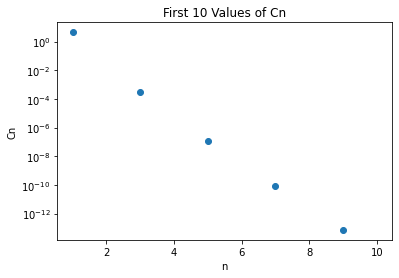

In [3]:
# Plotting the first 10 values of Cn we can see that the values are decreasing exponentially
plt.plot(N, Cn, 'o')
plt.title('First 10 Values of Cn')
plt.xlabel('n')
plt.ylabel('Cn')
plt.yscale('log')

Now that we've calculated our values of $C_n$, we can plug them into our solution to get our final solution:

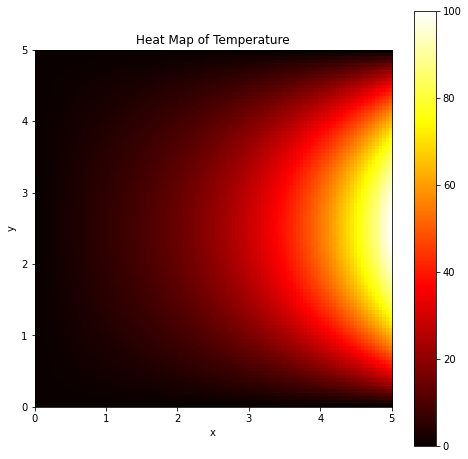

In [4]:
#Convert Cn to floats so that we can use them in our function
Cn = [float(i) for i in Cn]

# Define our function
def T(x, y, Cn = Cn, L = L):
    total_sum = 0
    for n in range(1,11): # We loop through the first 10 values of Cn to find our approximation
        total_sum += Cn[n-1] * np.sin(n * np.pi * y/L) * (np.exp(n * np.pi * x/L) - np.exp(-n * np.pi * x/L))
    return total_sum

# Plotting our function
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)
Z = T(X, Y)

#plot heatmap
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='hot', interpolation='nearest', extent=[0, L, 0, L])
plt.colorbar()
plt.title('Heat Map of Temperature')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


This solution looks exactly what we would expect from our experimental results. We have the three edges touching the ice all at 0 degrees, and the edge that is touching the quadratic heat source is spreading the heat out in a quadratic fashion through the plate with peak at 100. We can now use this solution make conclusions of how this temperature gradient looks. Additionally, from how we solved this problem we could easily change the boundary conditions on the right side to be another function of interest and our program would still work with the ease of changing just a bit of code.

## Computational Investigation

We now move to using the method of relaxation to compare our analytical results to numerical

In [5]:
# Code from ICA
def initialize_grid_2d(size):
    '''Initialize the grid of potential values'''
    return np.zeros((size, size))

def set_boundary(T, edge, value):
    '''T is the whole grid of potential values that you initialized
    edge is the edge of the grid that you want to set (top, bottom, left, right)
    value is the value you want to set the edge to (single number or array)'''
    if edge == 'top':
        T[0,:] = value
    elif edge == 'bottom':
        T[-1,:] = value
    elif edge == 'left':
        T[:,0] = value
    elif edge == 'right':
        T[:,-1] = value

def relax(T, N, tolerance, max_iterations=10000, store_frequency=50):
    '''T is the grid of potential values that you initialized
    after you set the boundary conditions. That is key!
    N is the size of the grid (assumed square
    tolerance is the stopping criterion - you control this; be careful
    max_iterations is the maximum number of iterations to run (stops loop if not converged)
    store_frequency is how often you want to store the T values (for plotting)'''
    
    iterations = 0 ## Keep track of the number of iterations
    delta = 1.0 ## Initialize delta (error) to be larger than tolerance
    
    stored_T = [] ## Keep track of T values for plotting
    stored_deltas = []  ## Keep track of delta values for plotting
    
    ## Loop condition to run until convergence or max_iterations
    while delta > tolerance and iterations < max_iterations:
        # Store the old T values to calculate delta later
        T_old = T.copy()
        for row in range(1, T.shape[0]-1):
            for col in range(1, T.shape[1]-1):
                T[row,col] = 0.25 * (T[row-1,col] + T[row+1,col] + T[row,col-1] + T[row,col+1])
        
        # Calculate delta: max difference between new and old T values
        delta = np.max(np.abs(T - T_old))
        
        ## Store T and delta values every store_frequency iterations
        if iterations % store_frequency == 0:
            stored_T.append(T.copy())
            stored_deltas.append(delta)
            print(f"Iteration: {iterations}, Delta: {delta}")

        ## Increment the iteration counter
        iterations += 1

    print(f"Converged after {iterations} iterations, with delta = {delta}")
    return stored_T, stored_deltas, iterations
    

In [6]:
# Using the method of relaxation to solve the problem
L = 5
dx = 0.05
tolerance = 1e-2
N = int(L/dx)

T = initialize_grid_2d(N+1)

# Set our machine made heat on the right edge
y = np.linspace(0, L, N+1)
T_right = -16*y**2 + 16*L*y
set_boundary(T, 'right', T_right)

# Have all other edges be in ice
set_boundary(T, 'top', 0)
set_boundary(T, 'bottom', 0)
set_boundary(T, 'left', 0)

# Relaxation
stored_T, stored_deltas, iterations = relax(T, N, tolerance)
print(f"Converged in {iterations} iterations.")

Iteration: 0, Delta: 33.32592592592592
Iteration: 50, Delta: 0.49938446986239526
Iteration: 100, Delta: 0.24222558340393263
Iteration: 150, Delta: 0.15718149597912756
Iteration: 200, Delta: 0.11504086007852621
Iteration: 250, Delta: 0.08983826712809417
Iteration: 300, Delta: 0.07305658669550041
Iteration: 350, Delta: 0.06115513552702012
Iteration: 400, Delta: 0.052246284374856344
Iteration: 450, Delta: 0.045325398491225855
Iteration: 500, Delta: 0.039807811415613514
Iteration: 550, Delta: 0.035319289899597095
Iteration: 600, Delta: 0.0315991121022563
Iteration: 650, Delta: 0.028464450397716945
Iteration: 700, Delta: 0.025790645907790122
Iteration: 750, Delta: 0.02348609574779914
Iteration: 800, Delta: 0.021486050725030736
Iteration: 850, Delta: 0.01973247249817689
Iteration: 900, Delta: 0.018183803815638555
Iteration: 950, Delta: 0.01680729720186136
Iteration: 1000, Delta: 0.015576802539541745
Iteration: 1050, Delta: 0.014471184942976834
Iteration: 1100, Delta: 0.013477776967164345
Ite

### Analyzing the results

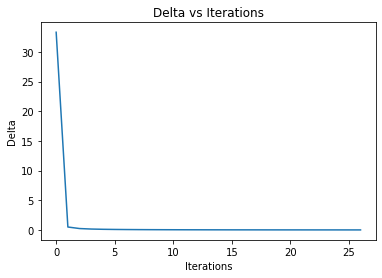

In [7]:
# First we want to see graphically how our delta change over iterations
plt.plot(stored_deltas)
plt.title('Delta vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.show()


Here we can see that we converge quite well onto a solution. Now we can take a look at the solution and compare to our analytical one.

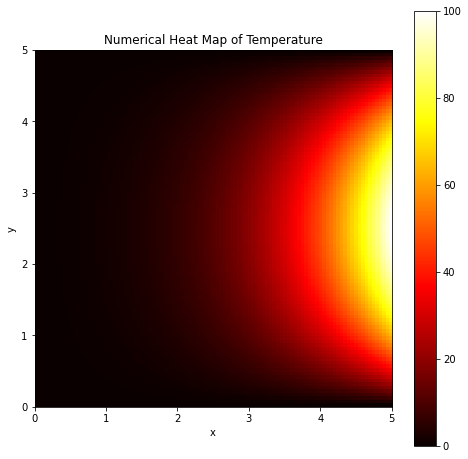

In [8]:
# Plotting our function
x = np.linspace(0, L, N+1)
y = np.linspace(0, L, N+1)
X, Y = np.meshgrid(x, y)
Z = T

#plot heatmap
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='hot', interpolation='nearest', extent=[0, L, 0, L])
plt.colorbar()
plt.title('Numerical Heat Map of Temperature')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


This looks identical to our analytical solution!!! This likely means that our analytical solution is correct. We can be confident to use our analytical solution to make conclusions about the temperature gradient of our plate in the experiment.